<a href="https://colab.research.google.com/github/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/01_Neural_Network_Regression_with_Tensorflow_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to neural network regression w/ TensorFlow**
# Predicting numbers as outcomes based on other numbers.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

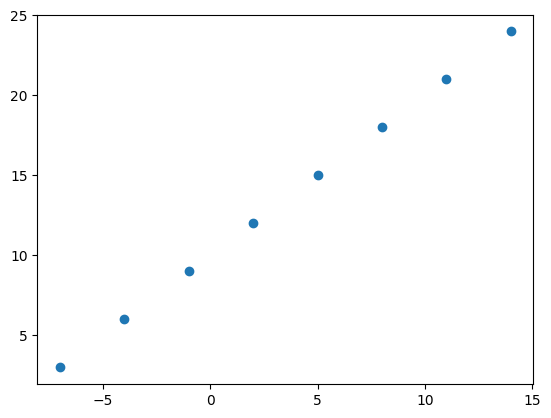

In [ ]:
# create data to view and fit

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# creatwe labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(X, y);

In [ ]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
y == X + 10 # relationship trying to learn -- the function between - ind var

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# input and output shapes
# create a demo tensor
house_info = tf.constant(["bedrooms", "bathrooms", "# of car(s) garage space"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=
 array([b'bedrooms', b'bathrooms', b'# of car(s) garage space'],
       dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0],  y[0]

(-7.0, 3.0)

In [ ]:
# major steps in modeling w/ tf -- turn np arrays into tensors w/ dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # returned a scalar

(TensorShape([]), TensorShape([]))

# **Steps for ML modeling**
1. **create a model:** define the input and output layers, also to include the hidden layers of a deep learning model.
2. **compile the model:** the function which tells our model how wrong it is, and the optimizer, which tells our model how to improve the patterns it learns. Evaluation metrics, used to interpret model performance
3. **fiting a model:** letting the model find patterns between X AND Y, aka features

# **Steps in TF:**
1. Get data ready -- convert to tensors
2. build or pick a model to suit problem
3. fit the model to the data and make a prediction
4. evaluate the model
5. save and reload the trained model

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # using one number to predict one number
])

#2. compile model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD stochastic gradient descent
              metrics=["mae"])

#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # 5 tries to figure out a pattern


Epoch 1/5
1/1 [==============================] - 1s 695ms/step - loss: 14.0933 - mae: 14.0933
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 13.9608 - mae: 13.9608
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.8283 - mae: 13.8283
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 13.6958 - mae: 13.6958
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 13.5633 - mae: 13.5633


In [ ]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try to predict using the model
model.predict([27]) # not very good -- we were expecting an approx. return of 10

1/1 [==============================] - 0s 142ms/step


array([[0.19813298]], dtype=float32)

# Improving the model
We can improve the model by altering/adjustiung the steps we used to create it.
1. create model -- add more layer, increase # of hidden units(neurons) within
each of the hidden layers - change activation function of each layer
2. compile model -- change optimization function -- learning rate hyper parameter of optimization function
3. fit model -- more epochs/rounds -- longer training time, or more examples to learn from

## lets create a larger model to see if we can improve our model and see if
## can predict the X + 10 fucntion pattern. Our first 5 epochs wasn't even close.


In [ ]:
#1 create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # originally used SGD()
              # error was near 3 points - result was 29.87 -- Adam was very close!
              metrics=["mae"])
#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 646ms/step - loss: 20.3222 - mae: 20.3222
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 20.3162 - mae: 20.3162
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 20.3102 - mae: 20.3102
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 20.3042 - mae: 20.3042
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 20.2982 - mae: 20.2982
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 20.2922 - mae: 20.2922
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2862 - mae: 20.2862
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 20.2802 - mae: 20.2802
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2742 - mae: 20.2742
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 20.2682 - mae: 20.2682
Epoch 11/100
1/1 [==============================] -

In [ ]:
# show the data for a reminder
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# LETS PREDICT! Did we improve?
model.predict([17.0]) # this has been run several times - not reflective of
# of original run w/ result of 27.136837

1/1 [==============================] - 0s 44ms/step


array([[21.208565]], dtype=float32)

In [ ]:
## Very nice... much better! using Adam reduced the error to within .136837
# remember my 1st run with SGD() as optimizer was 2.87 in error!
# Let's try to add more in baby steps towards a larger model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # originally .0001
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 35.4549 - mae: 35.4549
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.0966 - mae: 25.0966
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 16.6343 - mae: 16.6343
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4464 - mae: 9.4464
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6566 - mae: 8.6566
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5675 - mae: 11.5675
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3835 - mae: 13.3835
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3161 - mae: 12.3161
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0039 - mae: 10.0039
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.0624 - mae: 8.0624
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

In [ ]:
# now predict again and let's see...
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


array([[27.09747]], dtype=float32)

In [ ]:
# not good -- adding the hidden layer made it worse, even with Adam --
# then used .1 as learning rate and got the above result...NICE! - .09747 error!

#Evaluating a model
### In practice, tytpical workflow is as follows when building neural networks:
### Build a model --> fit --> evaluate it --> tweak it --> fit it --> eval --
### tweak --> fit --> eval...
### Most important -- visualize, visualize visualize
### * the data -- what data are we working with?
### * training -- how does it perform while it learns?
### * predictions of the model -- do they line up against the ground truth (original labels)


In [ ]:
# let's make a larger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels
y= X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

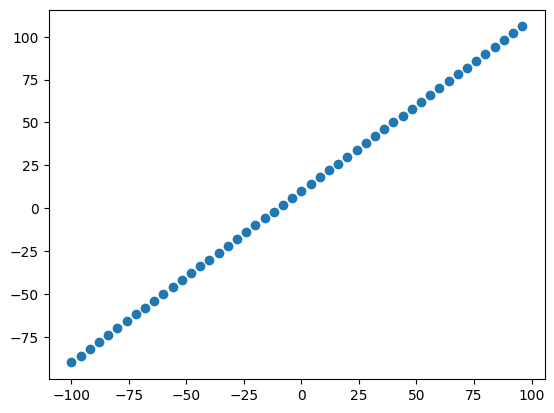

In [ ]:
# visualize data
plt.scatter(X, y)

# **The three set theory/idea**
## * **Training set** -- data to learn from - typically 70-80% of total data in store
## * **Validation set** - the model gets tuned on this dataset -- typically 10-15% of data in store
## * **Test set** - evaluation againsty this set to test what has been learned, typically 10-15% of data in store   

In [ ]:
# Check length of how many samples we have
len(X)

50

In [ ]:
# spliot data into training and test set
X_train = X[:40] # first 40 traing samples = 80% of data
y_train = y[:40]
X_test = X[40:] # last 10 = 20% of data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

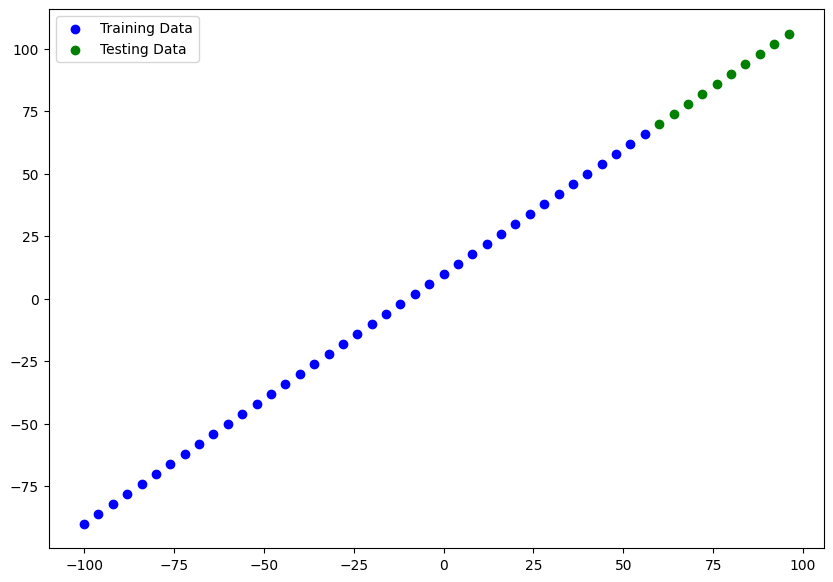

In [ ]:
# Visualize training and test sets
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
#plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [ ]:
# create new larger model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0018),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 38.0019 - mae: 38.0019
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.9744 - mae: 31.9744
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 26.6696 - mae: 26.6696
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 21.0237 - mae: 21.0237
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.8581 - mae: 14.8581
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.2198 - mae: 9.2198
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5432 - mae: 8.5432
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 6.2918 - mae: 6.2918
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 5.7653 - mae: 5.7653
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 7.1229 - mae: 7.1229
Epoch 11/100
2/2 [==============================] - 0s 10ms/step

In [ ]:
model.predict([36])

1/1 [==============================] - 0s 38ms/step


array([[47.347652]], dtype=float32)

In [ ]:
# pretty good! I adjusted the lr (learning_rate) from .0001 to what it is now
# I adjusted several times to end up with that learning_rate of .0018

In [ ]:
X.shape

TensorShape([50])

In [ ]:
# Build a model that auto builds by defining input_shape argument in the 1st layer
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # 10 = output
    # where 1 = input - see plot_model image below
    tf.keras.layers.Dense(1, name="output_layer")
], name="Sample_1")

# good to name your layers and models for better organization

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 56.6002 - mae: 56.6002
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 49.4128 - mae: 49.4128
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 42.5547 - mae: 42.5547
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 35.5097 - mae: 35.5097
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 28.6694 - mae: 28.6694
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 21.8442 - mae: 21.8442
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 15.2188 - mae: 15.2188
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9461 - mae: 8.9461
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0344 - mae: 9.0344
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6605 - mae: 11.6605
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

In [ ]:
model.summary() # verify against plot_model resultant image below

Model: "Sample_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Total params** = total # of parameters in model
## **Trainable parameters** = patterns model can update as it trains
## **Non-trainable params** = not updated during training -- imported models during transfer learning

In [ ]:
# visualizing a model's layers
from tensorflow.keras.utils import plot_model

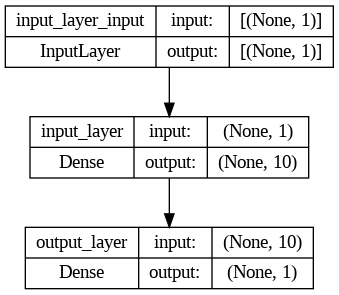

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
# Vizualizing our model's predictions

In [ ]:
#to viz predictions -- plot against ground truth layers
# i.e form of 'y_test' or 'y_true' vs 'y_preds'

# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 69.94082],
       [ 73.91625],
       [ 77.89168],
       [ 81.86712],
       [ 85.84254],
       [ 89.81798],
       [ 93.7934 ],
       [ 97.76884],
       [101.74427],
       [105.7197 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# viz by plot if you are going to reuse functionality - good idea to create
# a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions top ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # add extra dataset - plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show a legend
  plt.legend();

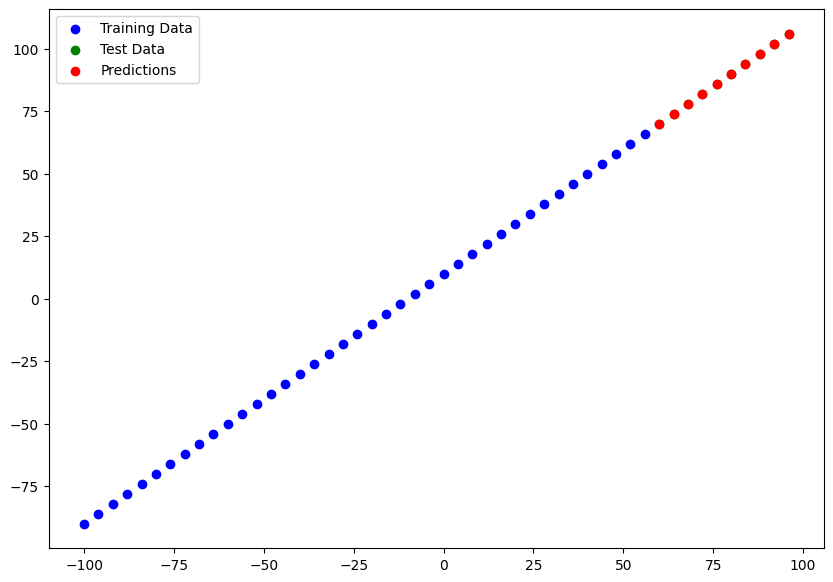

In [ ]:
plot_predictions()

#ON THE MONEY THIS TIME! I adjusted the Adam optimizer learning_rate to .01 from
# .001

# **This file has been renamed to 01_Neural_Network_Regression_with_Tensorflow-A.ipynb to relect the more accurate result** the file w/out -A is the original

# https://github.com/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/01_Neural_Network_Regression_with_Tensorflow-2nd-learning_rate-adjustment-to-.01.ipynb
# the above link has the notebook w/ the immensely accurate prediction I made
# using the Adam optimizer.

# Eval using regression eval methods/metrics to eval performance
# 2 main eval metrics are mae(mean absolute error) aka 'on avg how wrong is the
# prediction?' and mse(mean square error) aka 'square the avg errors'
# mae = good for starter metrics on any regression model
# mse = good for larger errors w/ more significance than smaller ones
# huber = combo of mae & mse -- less sensitive to outliers than mse

In [ ]:
# eval model on testset
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 343ms/step - loss: 0.1697 - mae: 0.1697


[0.16974182426929474, 0.16974182426929474]

In [ ]:
# calc the mean absolute error - mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.059181 , 14.866999 , 12.4649935, 10.853152 , 10.031492 ,
       10.       , 10.75868  , 12.307535 , 14.646563 , 17.775763 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred) # shape is going to be prob -- need (10, ) not (10,1)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.94082],
       [ 73.91625],
       [ 77.89168],
       [ 81.86712],
       [ 85.84254],
       [ 89.81798],
       [ 93.7934 ],
       [ 97.76884],
       [101.74427],
       [105.7197 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.94082,  73.91625,  77.89168,  81.86712,  85.84254,  89.81798,
        93.7934 ,  97.76884, 101.74427, 105.7197 ], dtype=float32)>

In [ ]:
# calculate mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred)) # squeeze to
                                     # get same shape tensors - (10, )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.16974029>

In [ ]:
# calc mse mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.033791594>

In [ ]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))

# **Running experiments to improve model performance**
## Remember: in practice, typical workflow is as follows when building neural networks:
## Build a model --> fit --> evaluate it --> tweak it --> fit it --> eval --
## tweak --> fit --> eval...
## Most important -- visualize, visualize visualize in a ML explorer role

# ML practioner role the motto is:
# **EXPERIMENT EXPERIMENT EXPERIMENT**
# Start with small experiments - small models - verify they work - increase scale/complexity when necessaery.
## 1. get more data - get more examples for your model to train - more opportunities to learn patterns or relationships between features and labels.
## 2. make model larger - using more complex model -- more layers, hidden units in each layer.
## 3. Train model longer -- more chances
## Let's do 3 diff model experiments:
##    a. model 1 - original model - 1 layer - trained for 100 epochs
##    b. model 2 -- 2 layers -- 100 epochs
##    c. model 3 -- 2 layers -- 500 epochs

In [ ]:
# let's build model 1 - set seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name="Experiment_1")

# complie model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit model
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 98.8346 - mae: 98.8346
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 63.3791 - mae: 63.3791
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 26.2398 - mae: 26.2398
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 11.3902 - mae: 11.3902
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6576 - mae: 12.6576
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7957 - mae: 9.7957
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.8798 - mae: 8.8798
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0976 - mae: 9.0976
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.4728 - mae: 19.4728
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.5357 - mae: 10.5357
Epoch 11/100
2/2 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 81ms/step


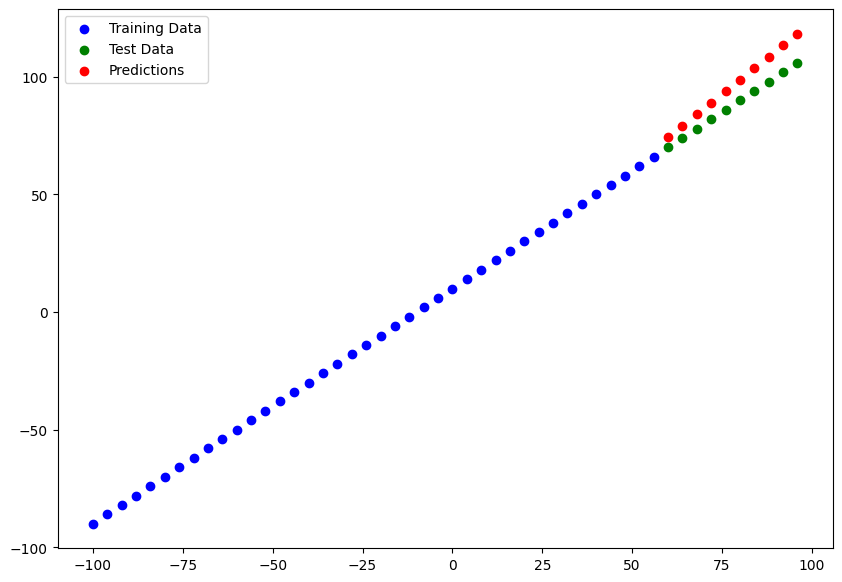

In [ ]:
y_preds = model.predict(X_test)
plot_predictions(predictions=y_preds)

In [ ]:
# Not so good
# calculate model eval metrics
mae_exp1 = mae(y_test, y_preds).numpy() # we used the tf.squeeze function in the def
mse_exp1 = mse(y_test, y_preds).numpy() # use numpy for reason below - pandas
                                          # DataFrame below
print(mae_exp1)
print("\n")
print(mse_exp1)

8.349749


76.03729


In [ ]:
# result is auto squeezed!
# let's do model 2 - 2 dense layers -- 10 hidden units - 100 epochs
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 31.0583 - mae: 31.0583
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 26.6623 - mae: 26.6623
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 32.2662 - mae: 32.2662
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 25.3641 - mae: 25.3641
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9878 - mae: 14.9878
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.9168 - mae: 11.9168
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2354 - mae: 11.2354
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1132 - mae: 11.1132
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.6604 - mae: 40.6604
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.0278 - mae: 28.0278
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 31ms/step


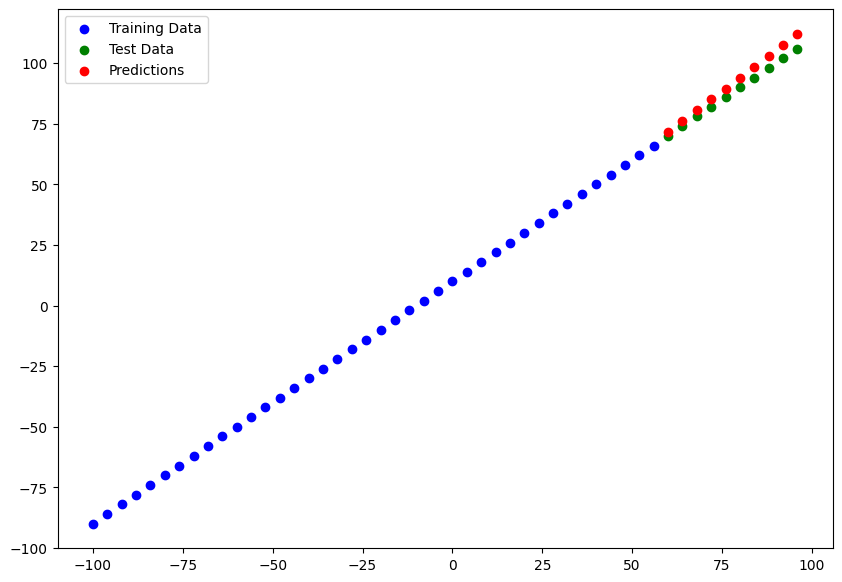

In [ ]:
y_preds_2 = model.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# better than model 1!
mae_exp2 = mae(y_test, y_preds_2).numpy() # we used the tf.squeeze function in the def
mse_exp2 = mse(y_test, y_preds_2).numpy() # use numpy for reason below - pandas
                                          # DataFrame below
print(mae_exp2)
print("\n")
print(mse_exp2)

3.7847946


16.514318


In [ ]:
# We see numerically that model 2 is more accurate than model 1 as well

In [ ]:
# Let's do model 3 -- 2 layers - 100 - hidden - 500 epochs
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
 ])

model_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"]
                 )
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 36.9561 - mae: 36.9561
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 29.4382 - mae: 29.4382
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 27.5382 - mae: 27.5382
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 15.6636 - mae: 15.6636
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 21.9879 - mae: 21.9879
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 10.7861 - mae: 10.7861
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 11.7931 - mae: 11.7931
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 12.1518 - mae: 12.1518
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 38.2303 - mae: 38.2303
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.7816 - mae: 25.7816
Epoch 11/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 198ms/step


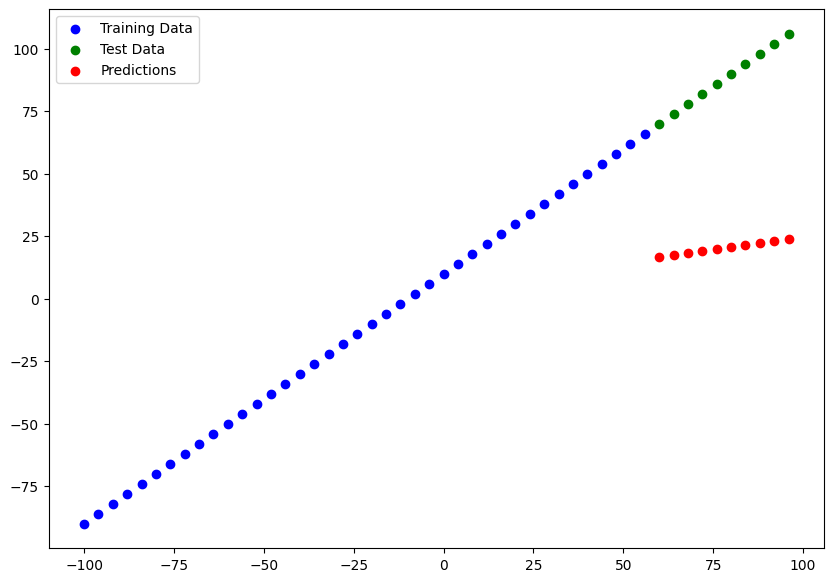

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_exp3 = mae(y_test, y_preds_3).numpy() # we used the tf.squeeze function
mse_exp3 = mse(y_test, y_preds_3).numpy() # use numpy for reason below - pandas
                                          # DataFrame below
print(mae_exp3)
print("\n")
print(mse_exp3)

67.65187


4660.837


In [ ]:
# THAT SUCKS!

In [ ]:
# How to compare results of all 3 models
# Create a pandas DataFrame
import pandas as pd

In [ ]:
model_results = (["model", mae_exp1, mse_exp1],
                 ["model_2", mae_exp2, mse_exp2],
                 ["model_3", mae_exp3, mse_exp3])
all_results = pd.DataFrame(model_results, columns=["Model Name", "MAE", "MSE"])
all_results

,Model Name,MAE,MSE
0,model,8.349749,76.037292
1,model_2,3.784795,16.514318
2,model_3,67.651871,4660.836914


In [ ]:
# Model 2 is clear winner

# Minimize time between experiments should be one of main goals, the more experiments done, the more you will find what DOESN'T WORK, and get closer to what DOES WORK

# Tracking your experiments
## One good habit is to track results of experiments - can be tedious if you run a great deal of them. There are extensions, such as TensorBoard, a compnent of the TensorFlow library to help track experiments. (We will revist this later)

In [ ]:
# Saving our models for export for outside colab, such as an app
# SavedModel format is default
# keras format

In [ ]:
model_2.save("model_2")

In [ ]:
model_2.save("model_2.keras")

In [ ]:
# load saved models
load_model_default = tf.keras.models.load_model("/content/model_2")
load_model_default.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
load_keras_model_2 = tf.keras.models.load_model("model_2.keras")
load_keras_model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Same all the way around
# Compare predictions
model_2_preds = model_2.predict(X_test)
load_keras_model_2_preds = load_keras_model_2.predict(X_test)
model_2_preds == load_keras_model_2_preds

1/1 [==============================] - 0s 21ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [1]:
# SWEET! IDENTICAL -- on to our capstone for this section!

# Larger datasets capstone for section 01 -- putting together what we have learned so far.
### We will be using the Medical Cost Personal Dataset. We will try to predict the individual medical costs billed by health insurance.
### https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [ ]:
## Libraries import
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset listed above from github
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance
# since we are working with trying to predict a number from other numbers,
# we will be using regression analysis.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## We need a dependent variable(outcome) and indepent variables(features) identified
## The dependent variable will be charges(what we are trying to predict)
## The independent features will be the rest of the columnar data categories, seen above: age, sex, bmi, children, smoker, region. These will be transformed into numerical values that we will use for our neural network.

In [ ]:
# Let's one-hot encode our DataFrame to convert string based categories to
# numbers first, so we can create a neural network regression model by th use
# of Pandas get_dummies function, basically one-hot encoding.

In [ ]:
insurance_one_hot = pd.get_dummies(insurance) # let's save as a variable
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values for model creation (neural network) training and test sets
# Create X -- feature set

In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# view y -- aka label vector
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Excellent, we have isolated charges as the dependent variable
# Create the training and test sets --  we can use scikitlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Create/build neural network akin to model_2 from 01 notebook
tf.random.set_seed(42)
charges_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ], name="charges_model_1")
# compile model
charges_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# fit the model
charges_model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8707.8398 - mae: 8707.8398
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7851.4521 - mae: 7851.4521
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.7715 - mae: 7613.7715
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7532.0815 - mae: 7532.0815
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7726.1328 - mae: 7726.1328
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.4312 - mae: 7644.4312
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7556.7388 - mae: 7556.7388
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7740.7222 - mae: 7740.7222
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7554.5283 - mae: 7554.5283
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7696.4897 - mae: 7696.4897

In [ ]:
charges_model_1.summary()

Model: "charges_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 10)             120       
                                                                 
 dense_1 (Dense)             (None, 1, 1)              11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
charges_model_1.evaluate(X_test, y_test ) # wrong by 7108 approx on average

9/9 [==============================] - 0s 2ms/step - loss: 7108.3599 - mae: 7108.3599


[7108.35986328125, 7108.35986328125]

In [ ]:
y_train.median(), y_train.mean() # substantially incorrect

(9575.4421, 13346.089736364485)

In [ ]:
# We need to improve our model for a better result -- experiment!

In [ ]:
# lets create a new model with improvements as we have done before
# we will add more layers and increase Density of hideden layers & epochs
# and use Adam as the optimizer
tf.random.set_seed(42)
charges_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

charges_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
training_history = charges_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13247.8838 - mae: 13247.8838
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13010.3096 - mae: 13010.3096
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12539.7852 - mae: 12539.7852
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11686.1797 - mae: 11686.1797
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10402.1006 - mae: 10402.1006
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 8949.1855 - mae: 8949.1855
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7829.1040 - mae: 7829.1040
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7476.1426 - mae: 7476.1426
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7427.1782 - mae: 7427.1782
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7407.5396 - mae:

In [ ]:
charges_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3480.0227 - mae: 3480.0227


[3480.022705078125, 3480.022705078125]

In [ ]:
# WOW, we cut it in approx. half! Let's check our training history and see

Text(0.5, 0, 'epochs')

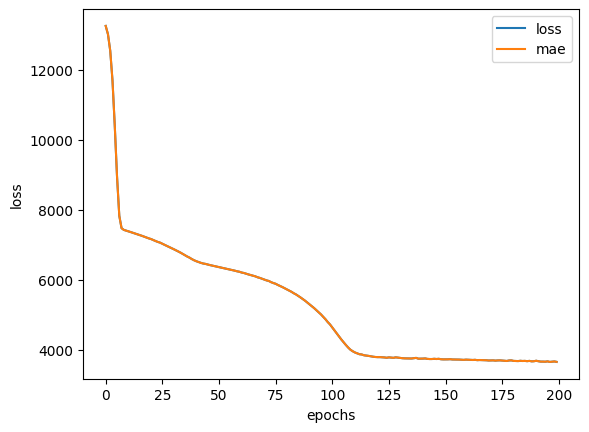

In [ ]:
# Plot history aka training curve or loss curve
pd.DataFrame(training_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# This is a good sign!
## We see the curve on a steep decline. So we see that if wetrain longer, we may get closer to more accuracy. So that begs the ? How long to train for? Answer: it depends. lol
## There is no immutable answer.
## But... maybe there is... EarlyStopping Callback :-)
## TensorFlow component that stops the model training epochs once it stops improving a certain metric. We will explore later on!

In [2]:
# Ok, great work there! Now let's move on to getting closer to the section end
# Preprocessing data w/ feature scaling